# LTC Senior Population growth Analysis

### Importing necessary packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#pip install xlrd

In [3]:
#pip install openpyxl

### Reading the data into a dataframe

In [4]:
df=pd.read_excel('6_regions_mof_population_projections_2021-2046.xlsx', index_col=False)
df.head(10)

,"Population Projections for Ontario's 6 regions by Age and Sex, 2021-2046",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117
0,Sources: Statistics Canada for 2021 and Ontari...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,BROAD AGE GROUPS,NaN,NaN,5-YEAR AGE GROUPS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YEAR (JULY 1),REGION CODE,REGION NAME,SEX,TOTAL,0 to 14,15 to 64,65 Plus,0 to 4,5 to 9,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90+
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,51,GREATER TORONTO AREA,MALE,3489629,548214,2437537,503878,173827,181329,...,13259.0,12173.0,10991.0,10157.0,9263.0,8130.0,7105.0,6549.0,5427.0,19389
6,2021,52,CENTRAL,MALE,1611905,256413,1062610,292882,81626,86958,...,7456.0,6855.0,6372.0,5693.0,5116.0,4401.0,3882.0,3417.0,3004.0,10428
7,2021,53,EAST,MALE,960035,149572,635105,175358,46407,50635,...,4395.0,4115.0,3827.0,3414.0,2940.0,2596.0,2189.0,1939.0,1687.0,5753
8,2021,54,SOUTHWEST,MALE,860572,142637,555867,162068,44695,48601,...,4089.0,3842.0,3529.0,3051.0,2763.0,2403.0,2132.0,1848.0,1547.0,5586
9,2021,55,NORTHEAST,MALE,283242,42025,180149,61068,12522,14671,...,1616.0,1461.0,1261.0,1185.0,1106.0,928.0,797.0,690.0,581.0,1925


## Data Cleaning and Transformation

In [5]:
#Removing unwanted rows and aligning the column header in place
df1=df.drop(labels=[0,1,2,4],axis=0, inplace=False)
df1.head()

,"Population Projections for Ontario's 6 regions by Age and Sex, 2021-2046",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117
3,YEAR (JULY 1),REGION CODE,REGION NAME,SEX,TOTAL,0 to 14,15 to 64,65 Plus,0 to 4,5 to 9,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90+
5,2021,51,GREATER TORONTO AREA,MALE,3489629,548214,2437537,503878,173827,181329,...,13259.0,12173.0,10991.0,10157.0,9263.0,8130.0,7105.0,6549.0,5427.0,19389
6,2021,52,CENTRAL,MALE,1611905,256413,1062610,292882,81626,86958,...,7456.0,6855.0,6372.0,5693.0,5116.0,4401.0,3882.0,3417.0,3004.0,10428
7,2021,53,EAST,MALE,960035,149572,635105,175358,46407,50635,...,4395.0,4115.0,3827.0,3414.0,2940.0,2596.0,2189.0,1939.0,1687.0,5753
8,2021,54,SOUTHWEST,MALE,860572,142637,555867,162068,44695,48601,...,4089.0,3842.0,3529.0,3051.0,2763.0,2403.0,2132.0,1848.0,1547.0,5586


In [6]:
df1.columns=df1.iloc[0]
df1.head()

3,YEAR (JULY 1),REGION CODE,REGION NAME,SEX,TOTAL,0 to 14,15 to 64,65 Plus,0 to 4,5 to 9,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90+
3,YEAR (JULY 1),REGION CODE,REGION NAME,SEX,TOTAL,0 to 14,15 to 64,65 Plus,0 to 4,5 to 9,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90+
5,2021,51,GREATER TORONTO AREA,MALE,3489629,548214,2437537,503878,173827,181329,...,13259.0,12173.0,10991.0,10157.0,9263.0,8130.0,7105.0,6549.0,5427.0,19389
6,2021,52,CENTRAL,MALE,1611905,256413,1062610,292882,81626,86958,...,7456.0,6855.0,6372.0,5693.0,5116.0,4401.0,3882.0,3417.0,3004.0,10428
7,2021,53,EAST,MALE,960035,149572,635105,175358,46407,50635,...,4395.0,4115.0,3827.0,3414.0,2940.0,2596.0,2189.0,1939.0,1687.0,5753
8,2021,54,SOUTHWEST,MALE,860572,142637,555867,162068,44695,48601,...,4089.0,3842.0,3529.0,3051.0,2763.0,2403.0,2132.0,1848.0,1547.0,5586


In [7]:
df1.drop(labels=3, axis=0,inplace=True)
df1.head()

3,YEAR (JULY 1),REGION CODE,REGION NAME,SEX,TOTAL,0 to 14,15 to 64,65 Plus,0 to 4,5 to 9,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90+
5,2021,51,GREATER TORONTO AREA,MALE,3489629,548214,2437537,503878,173827,181329,...,13259.0,12173.0,10991.0,10157.0,9263.0,8130.0,7105.0,6549.0,5427.0,19389
6,2021,52,CENTRAL,MALE,1611905,256413,1062610,292882,81626,86958,...,7456.0,6855.0,6372.0,5693.0,5116.0,4401.0,3882.0,3417.0,3004.0,10428
7,2021,53,EAST,MALE,960035,149572,635105,175358,46407,50635,...,4395.0,4115.0,3827.0,3414.0,2940.0,2596.0,2189.0,1939.0,1687.0,5753
8,2021,54,SOUTHWEST,MALE,860572,142637,555867,162068,44695,48601,...,4089.0,3842.0,3529.0,3051.0,2763.0,2403.0,2132.0,1848.0,1547.0,5586
9,2021,55,NORTHEAST,MALE,283242,42025,180149,61068,12522,14671,...,1616.0,1461.0,1261.0,1185.0,1106.0,928.0,797.0,690.0,581.0,1925


In [8]:
# Storing the resulting clean dataframe in 'rslt_df'
rslt_df=df1.reset_index(drop=True)

In [9]:
rslt_df.head(10)

3,YEAR (JULY 1),REGION CODE,REGION NAME,SEX,TOTAL,0 to 14,15 to 64,65 Plus,0 to 4,5 to 9,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90+
0,2021,51,GREATER TORONTO AREA,MALE,3489629,548214,2437537,503878,173827,181329,...,13259.0,12173.0,10991.0,10157.0,9263.0,8130.0,7105.0,6549.0,5427.0,19389
1,2021,52,CENTRAL,MALE,1611905,256413,1062610,292882,81626,86958,...,7456.0,6855.0,6372.0,5693.0,5116.0,4401.0,3882.0,3417.0,3004.0,10428
2,2021,53,EAST,MALE,960035,149572,635105,175358,46407,50635,...,4395.0,4115.0,3827.0,3414.0,2940.0,2596.0,2189.0,1939.0,1687.0,5753
3,2021,54,SOUTHWEST,MALE,860572,142637,555867,162068,44695,48601,...,4089.0,3842.0,3529.0,3051.0,2763.0,2403.0,2132.0,1848.0,1547.0,5586
4,2021,55,NORTHEAST,MALE,283242,42025,180149,61068,12522,14671,...,1616.0,1461.0,1261.0,1185.0,1106.0,928.0,797.0,690.0,581.0,1925
5,2021,56,NORTHWEST,MALE,121298,20554,78024,22720,6434,7000,...,542.0,509.0,406.0,370.0,359.0,327.0,266.0,244.0,206.0,723
6,2022,51,GREATER TORONTO AREA,MALE,3567572,552912,2491763,522897,175804,182783,...,13284.0,12573.0,11481.0,10291.0,9430.0,8532.0,7420.0,6405.0,5843.0,20307
7,2022,52,CENTRAL,MALE,1642456,258821,1081000,302635,81966,87852,...,7906.0,7019.0,6406.0,5904.0,5229.0,4649.0,3953.0,3439.0,2987.0,10960
8,2022,53,EAST,MALE,974241,150028,642793,181420,46527,50597,...,4621.0,4142.0,3851.0,3553.0,3143.0,2683.0,2340.0,1947.0,1703.0,6080
9,2022,54,SOUTHWEST,MALE,874202,143509,563399,167294,44884,48796,...,4281.0,3842.0,3577.0,3264.0,2795.0,2506.0,2153.0,1885.0,1613.0,5810


In [10]:
# Filtering data for both genders to give total population
rslt_df=rslt_df[rslt_df['SEX']=='TOTAL']
rslt_df.head()

3,YEAR (JULY 1),REGION CODE,REGION NAME,SEX,TOTAL,0 to 14,15 to 64,65 Plus,0 to 4,5 to 9,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90+
312,2021,51,GREATER TORONTO AREA,TOTAL,7101932,1071370,4901816,1128746,338512,354958,...,30698.0,28388.0,26134.0,24131.0,22323.0,19957.0,17836.0,16544.0,14288.0,60967
313,2021,52,CENTRAL,TOTAL,3236157,501359,2094605,640193,158924,169830,...,16663.0,15599.0,14251.0,12886.0,11999.0,10709.0,9544.0,8566.0,7743.0,31788
314,2021,53,EAST,TOTAL,1946115,294662,1268595,382858,90936,100000,...,9825.0,9241.0,8566.0,7589.0,6960.0,6266.0,5483.0,4936.0,4334.0,18192
315,2021,54,SOUTHWEST,TOTAL,1731390,279629,1097771,353990,87491,95005,...,9113.0,8705.0,8026.0,7072.0,6562.0,5885.0,5309.0,4747.0,4264.0,17997
316,2021,55,NORTHEAST,TOTAL,569554,82303,356753,130498,24490,28629,...,3572.0,3265.0,2855.0,2701.0,2590.0,2227.0,1932.0,1760.0,1606.0,5965


In [11]:
# Occurrence of Population data by region
rslt_df['REGION NAME'].value_counts()

CENTRAL                 26
SOUTHWEST               26
GREATER TORONTO AREA    26
EAST                    26
NORTHWEST               26
NORTHEAST               26
Name: REGION NAME, dtype: int64

In [30]:
# Preparing data to filter by region
regions=['CENTRAL', 'SOUTHWEST', 'EAST', 'GREATER TORONTO AREA']
rslt_df=rslt_df[rslt_df['REGION NAME'].isin(regions)]
rslt_df.reset_index(drop=True) 

3,YEAR (JULY 1),REGION CODE,REGION NAME,SEX,TOTAL,0 to 14,15 to 64,65 Plus,0 to 4,5 to 9,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90+
0,2021,51,GREATER TORONTO AREA,TOTAL,7101932,1071370,4901816,1128746,338512,354958,...,30698.0,28388.0,26134.0,24131.0,22323.0,19957.0,17836.0,16544.0,14288.0,60967
1,2021,52,CENTRAL,TOTAL,3236157,501359,2094605,640193,158924,169830,...,16663.0,15599.0,14251.0,12886.0,11999.0,10709.0,9544.0,8566.0,7743.0,31788
2,2021,53,EAST,TOTAL,1946115,294662,1268595,382858,90936,100000,...,9825.0,9241.0,8566.0,7589.0,6960.0,6266.0,5483.0,4936.0,4334.0,18192
3,2021,54,SOUTHWEST,TOTAL,1731390,279629,1097771,353990,87491,95005,...,9113.0,8705.0,8026.0,7072.0,6562.0,5885.0,5309.0,4747.0,4264.0,17997
4,2022,51,GREATER TORONTO AREA,TOTAL,7253227,1079966,5004891,1168370,342718,357180,...,30774.0,29372.0,27029.0,24742.0,22678.0,20841.0,18480.0,16355.0,15018.0,62860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2045,54,SOUTHWEST,TOTAL,2275864,356933,1370735,548196,118481,120062,...,21536.0,20977.0,19761.0,18805.0,17500.0,16059.0,14644.0,13320.0,11640.0,52789
100,2046,51,GREATER TORONTO AREA,TOTAL,10035556,1482912,6577232,1975412,496941,494224,...,72266.0,71344.0,68411.0,62775.0,59556.0,55260.0,49909.0,45485.0,40773.0,187777
101,2046,52,CENTRAL,TOTAL,4573497,692230,2815106,1066161,229657,233004,...,41099.0,40476.0,38620.0,36114.0,34069.0,31169.0,28228.0,25358.0,22585.0,102103
102,2046,53,EAST,TOTAL,2650963,384318,1638798,627847,127458,129087,...,24408.0,24196.0,23220.0,21788.0,20483.0,18906.0,17030.0,15487.0,13799.0,62522


## EDA & Data Visualization: 

In [15]:
# Filtering data by southwest region
rslt_sw=rslt_df[rslt_df['REGION NAME']=='SOUTHWEST']
rslt_sw.head(10)

3,YEAR (JULY 1),REGION CODE,REGION NAME,SEX,TOTAL,0 to 14,15 to 64,65 Plus,0 to 4,5 to 9,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90+
315,2021,54,SOUTHWEST,TOTAL,1731390,279629,1097771,353990,87491,95005,...,9113.0,8705.0,8026.0,7072.0,6562.0,5885.0,5309.0,4747.0,4264.0,17997
321,2022,54,SOUTHWEST,TOTAL,1757911,281158,1111211,365542,87848,95199,...,9629.0,8667.0,8220.0,7531.0,6585.0,6058.0,5380.0,4800.0,4240.0,18562
327,2023,54,SOUTHWEST,TOTAL,1786408,282423,1126390,377595,88043,95757,...,10324.0,9181.0,8216.0,7738.0,7032.0,6096.0,5556.0,4876.0,4296.0,19060
333,2024,54,SOUTHWEST,TOTAL,1809808,283674,1136471,389663,88348,96059,...,10818.0,9847.0,8706.0,7743.0,7234.0,6516.0,5593.0,5041.0,4369.0,19513
339,2025,54,SOUTHWEST,TOTAL,1831233,285101,1144167,401965,89010,96134,...,11273.0,10325.0,9343.0,8211.0,7247.0,6712.0,5986.0,5081.0,4521.0,19946
345,2026,54,SOUTHWEST,TOTAL,1851869,286840,1150630,414399,90365,95526,...,11524.0,10770.0,9804.0,8815.0,7690.0,6732.0,6175.0,5444.0,4563.0,20450
351,2027,54,SOUTHWEST,TOTAL,1873389,288822,1157550,427017,91682,96010,...,12147.0,11025.0,10242.0,9264.0,8266.0,7152.0,6203.0,5625.0,4897.0,20927
357,2028,54,SOUTHWEST,TOTAL,1894260,290943,1163483,439834,92835,96444,...,14756.0,11634.0,10494.0,9688.0,8699.0,7696.0,6596.0,5658.0,5069.0,21639
363,2029,54,SOUTHWEST,TOTAL,1915291,292974,1170207,452110,93837,97098,...,14641.0,14142.0,11087.0,9936.0,9104.0,8110.0,7106.0,6024.0,5105.0,22419
369,2030,54,SOUTHWEST,TOTAL,1936496,295171,1177879,463446,94810,98130,...,14595.0,14045.0,13489.0,10507.0,9350.0,8501.0,7497.0,6499.0,5443.0,23127


In [16]:
rslt_sw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 315 to 465
Columns: 118 entries, YEAR (JULY 1) to 90+
dtypes: float64(89), object(29)
memory usage: 24.2+ KB


In [17]:
sw=rslt_sw[['YEAR (JULY 1)','TOTAL','0 to 14', '15 to 64', '65 Plus']]

sw

3,YEAR (JULY 1),TOTAL,0 to 14,15 to 64,65 Plus
315,2021,1731390,279629,1097771,353990
321,2022,1757911,281158,1111211,365542
327,2023,1786408,282423,1126390,377595
333,2024,1809808,283674,1136471,389663
339,2025,1831233,285101,1144167,401965
345,2026,1851869,286840,1150630,414399
351,2027,1873389,288822,1157550,427017
357,2028,1894260,290943,1163483,439834
363,2029,1915291,292974,1170207,452110
369,2030,1936496,295171,1177879,463446


In [11]:
# Filtering data by Central region
central=rslt_df[rslt_df['REGION NAME']=='CENTRAL']
central=central[['YEAR (JULY 1)','TOTAL','0 to 14', '15 to 64', '65 Plus']]
central.head(10)

3,YEAR (JULY 1),TOTAL,0 to 14,15 to 64,65 Plus
313,2021,3236157,501359,2094605,640193
319,2022,3296505,505636,2129346,661523
325,2023,3360133,509671,2166443,684019
331,2024,3414460,514401,2192709,707350
337,2025,3465849,519274,2215034,731541
343,2026,3516512,524894,2234837,756781
349,2027,3568469,530730,2255530,782209
355,2028,3619252,537148,2274090,808014
361,2029,3670371,543562,2293063,833746
367,2030,3721799,549954,2313848,857997


In [18]:
## Filtering data by GTA region
gta=rslt_df[rslt_df['REGION NAME']=='GREATER TORONTO AREA']
gta=gta[['YEAR (JULY 1)','TOTAL','0 to 14', '15 to 64', '65 Plus']]
gta.head(10)

3,YEAR (JULY 1),TOTAL,0 to 14,15 to 64,65 Plus
312,2021,7101932,1071370,4901816,1128746
318,2022,7253227,1079966,5004891,1168370
324,2023,7398092,1087284,5100677,1210131
330,2024,7528351,1098252,5176773,1253326
336,2025,7652143,1111502,5241314,1299327
342,2026,7775444,1126917,5302084,1346443
348,2027,7891735,1141976,5357674,1392085
354,2028,8004610,1157920,5405804,1440886
360,2029,8117654,1175760,5453022,1488872
366,2030,8230806,1194548,5502716,1533542


In [19]:
## Filtering data by East region 
east=rslt_df[rslt_df['REGION NAME']=='EAST']
east=east[['YEAR (JULY 1)','TOTAL','0 to 14', '15 to 64', '65 Plus']]
#east.head(10)

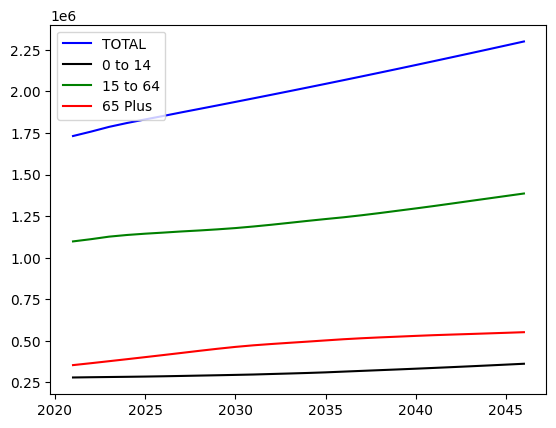

In [18]:
#Plotting population growth for various age groups between 2020 and 2046
plt.plot('YEAR (JULY 1)', 'TOTAL', data=sw, color='blue')
plt.plot('YEAR (JULY 1)', '0 to 14', data=sw, color='black')
plt.plot('YEAR (JULY 1)', '15 to 64', data=sw, color='green')
plt.plot('YEAR (JULY 1)', '65 Plus', data=sw, color='red')
plt.legend()
plt.show()

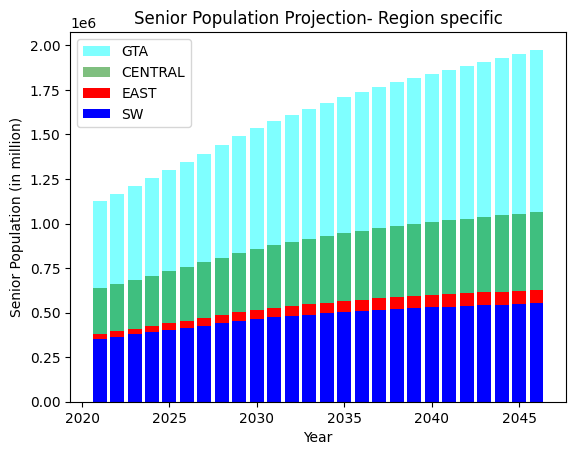

In [29]:
#Plotting population growth for Seniors by region
plt.bar('YEAR (JULY 1)', '65 Plus', data=gta, color='cyan', alpha=0.5)
plt.bar('YEAR (JULY 1)', '65 Plus', data=central, color='green', alpha=0.5)
plt.bar('YEAR (JULY 1)', '65 Plus', data=east, color='red', alpha=1)
plt.bar('YEAR (JULY 1)', '65 Plus', data=sw, color='blue', alpha=1)
plt.legend(['GTA','CENTRAL','EAST','SW'])
plt.xlabel('Year')
plt.ylabel('Senior Population (in million)')
plt.title('Senior Population Projection- Region specific')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e9a1f814-4f13-44e8-8986-0e91b61d0d66' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>